#### Logistic Regression and classification
## $$J(\theta) = Cost(X, y, \theta) + \lambda R(\theta)$$

- The second term in the above function is called **regularization term**.
- The $\lambda$ is **regularization strength**, a mean to balance or trade-off between our two different objectives.

In [80]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

import warnings

In [81]:
# initial setup
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150

plt.style.use('ggplot')
np.random.seed(1)
np.set_printoptions(precision=2, linewidth=100)
warnings.filterwarnings(action='ignore')

## Regression with Regularization

#### Generate data

In [53]:
def f(x):
    return np.sin(1.5 * np.pi * x)

def generate_data(n_samples=30):
    x = np.sort(np.random.rand(n_samples))
    y = f(x) + 0.1 * np.random.randn(n_samples) 
    return x, y

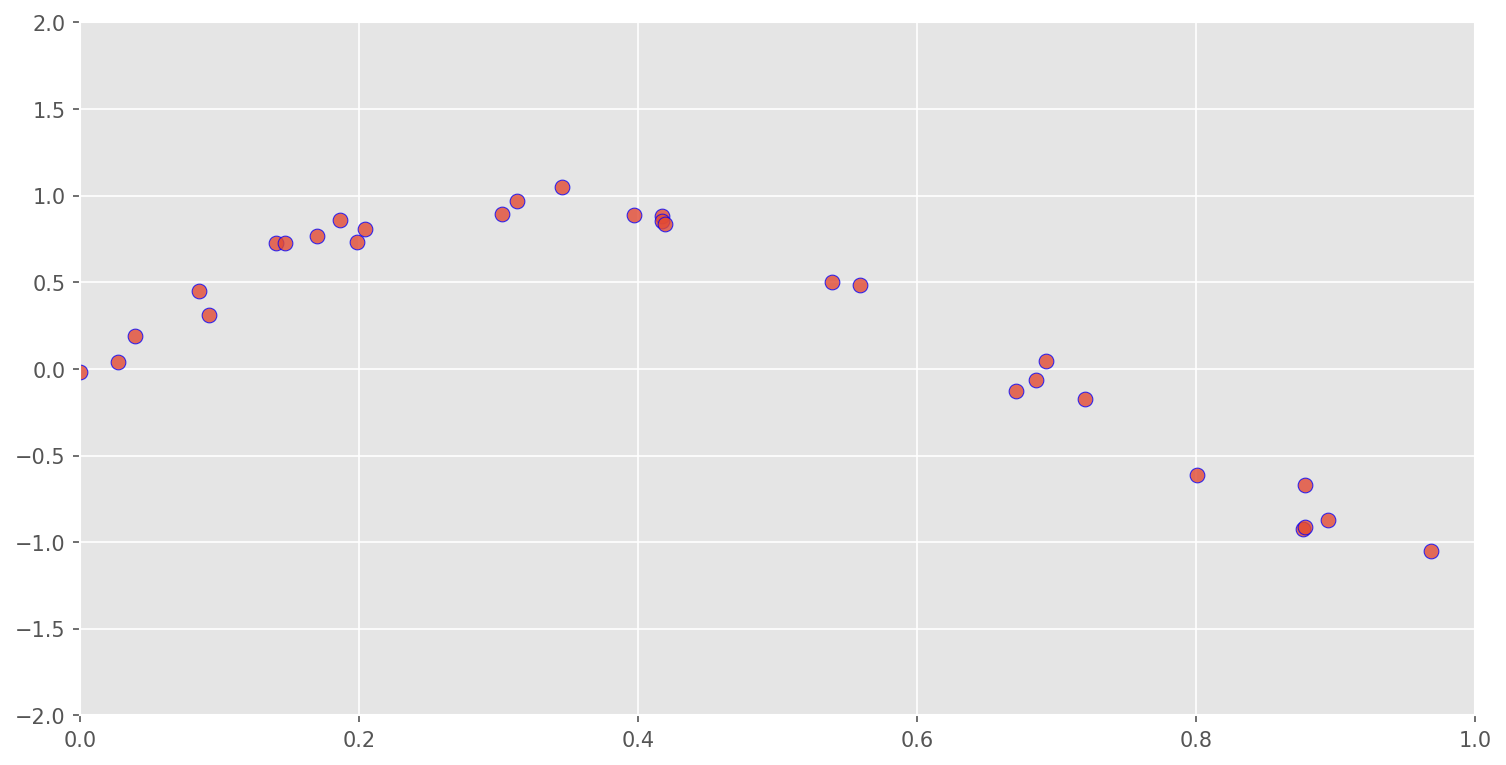

In [54]:
n_samples = 30 # number of data samples
x, y = generate_data(n_samples)
#print(x)
#print(y)

# plot data
plt.figure()
plt.scatter(x, y, s=50, edgecolors='b', alpha=0.8, cmap=plt.cm.coolwarm)
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

### Polynomial Regression

In [55]:
def fit_poly(x, y, degree=1):
    
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

In [56]:
degrees = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

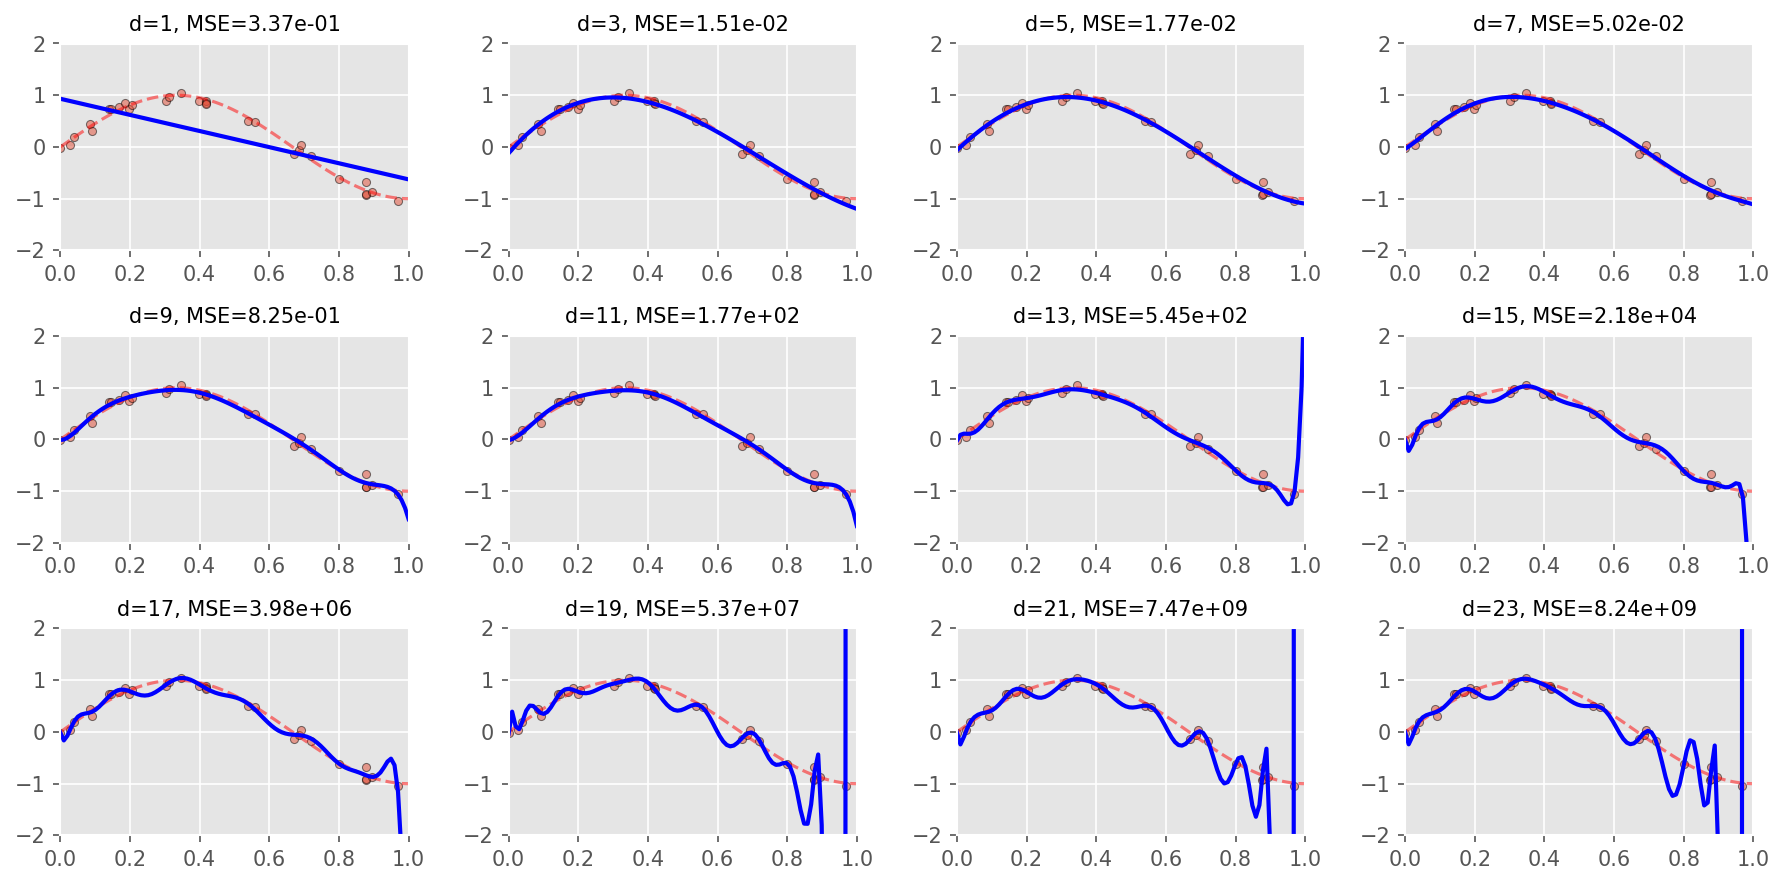

In [57]:
plt.figure()

for d in degrees:
    model = fit_poly(x, y, degree=d)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(3, 4, degrees.index(d) + 1)
    plt.tight_layout()
    
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'b', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

plt.show()

In [58]:
def plot_coef(theta):
    plt.figure()
    plt.bar(np.arange(1, len(theta) + 1), height=np.abs(theta))
    plt.show()

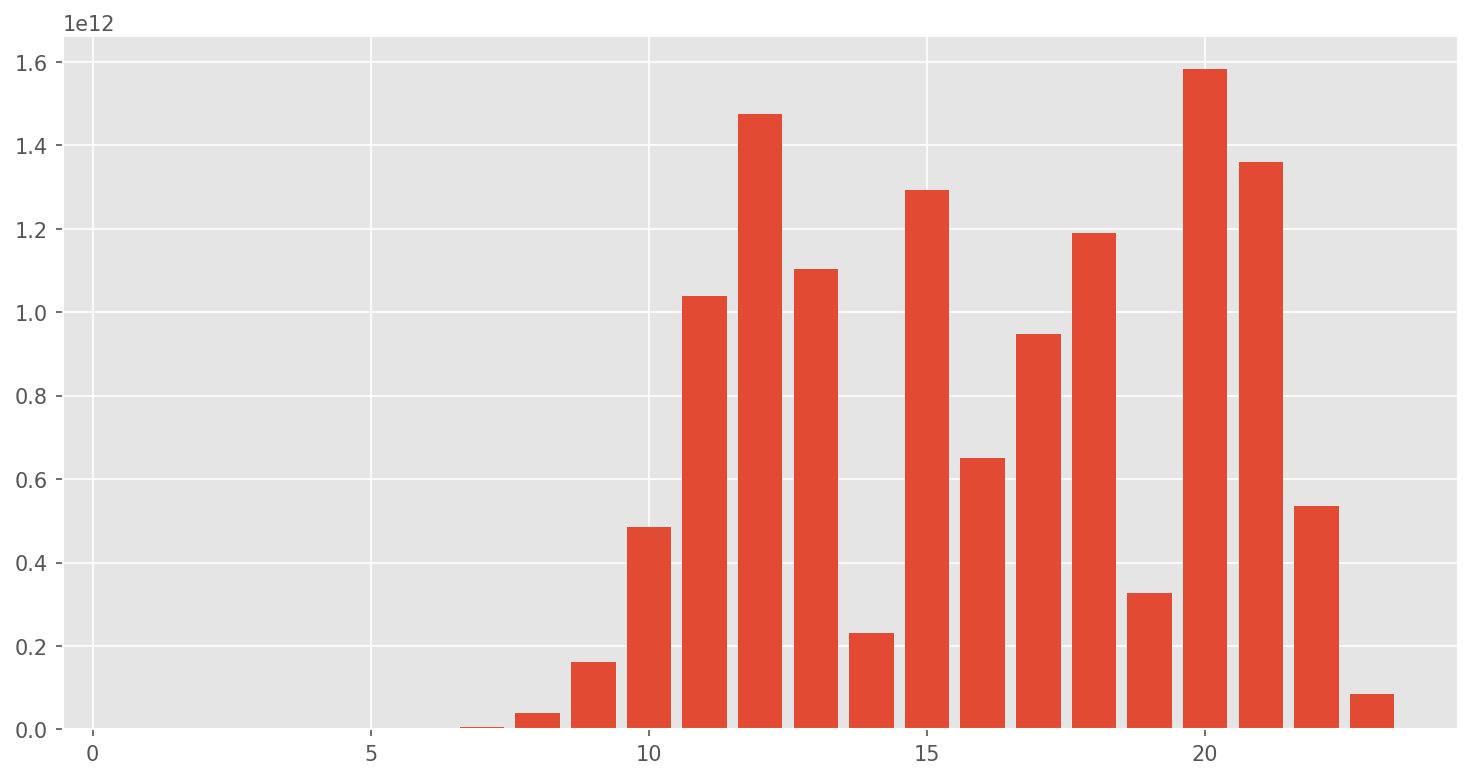

In [59]:
plot_coef(model.steps[1][1].coef_)

### L2-Regularizarion (Ridge)

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$$

In [60]:
def fit_poly_L2_reg(degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = Ridge(alpha=lmbda)
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

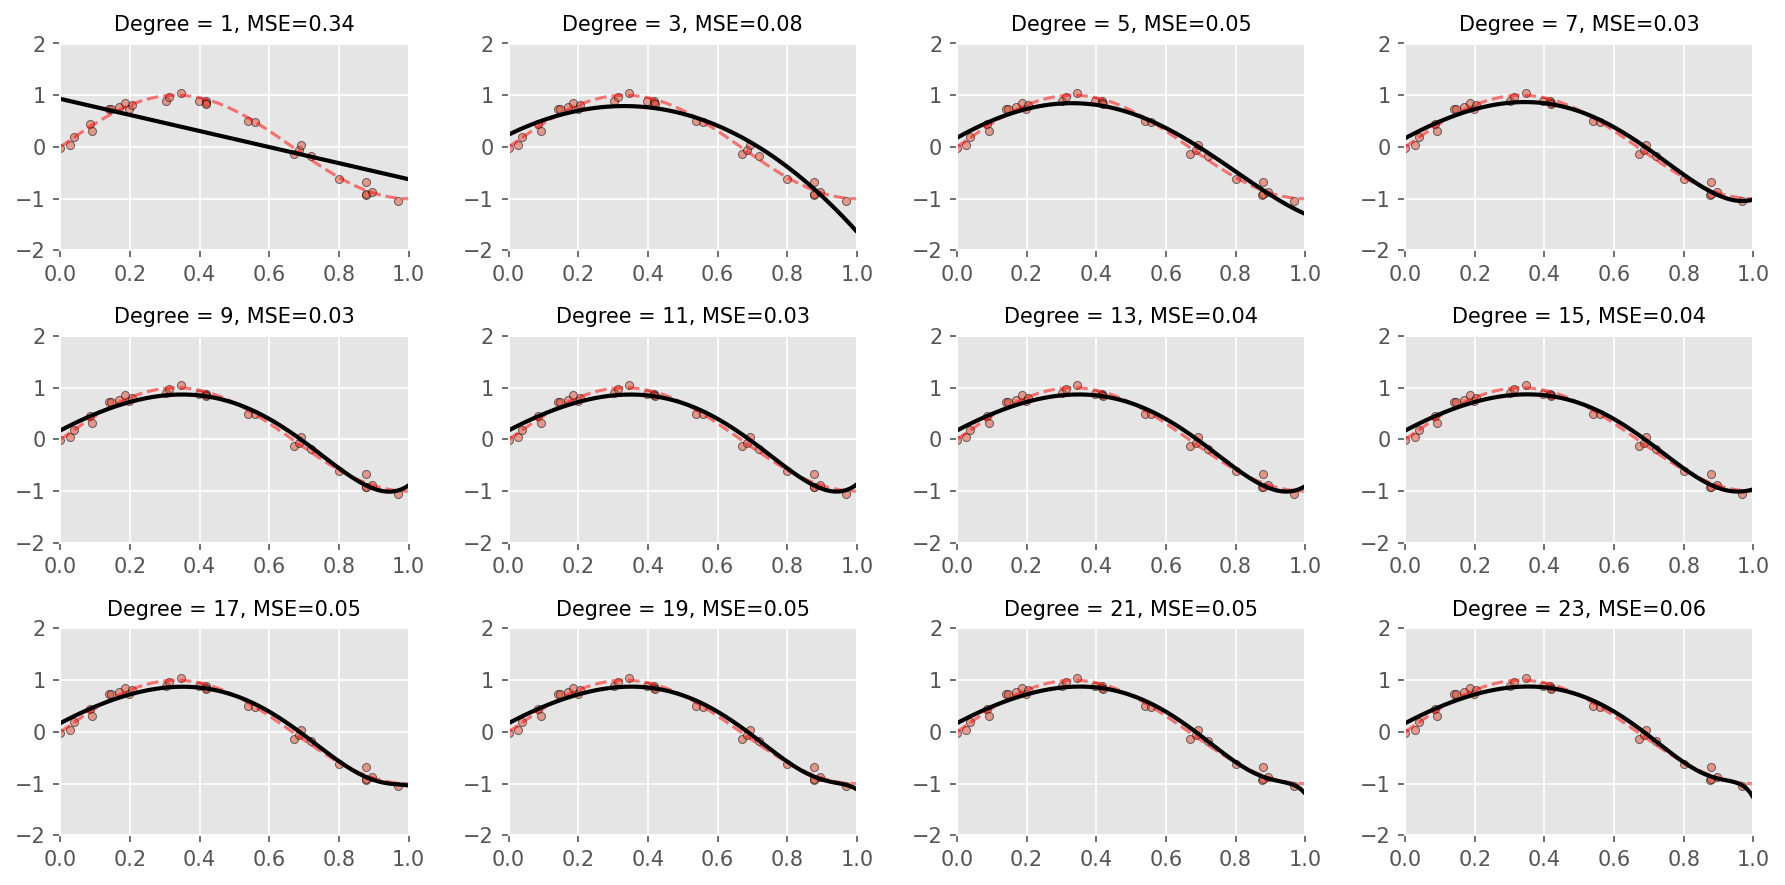

In [61]:
lmbda = 1e-2

plt.figure()

for d in degrees:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(3, 4, degrees.index(d) + 1)
    plt.tight_layout()
    
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10)

plt.show()

Visualizing effect of $\lambda$

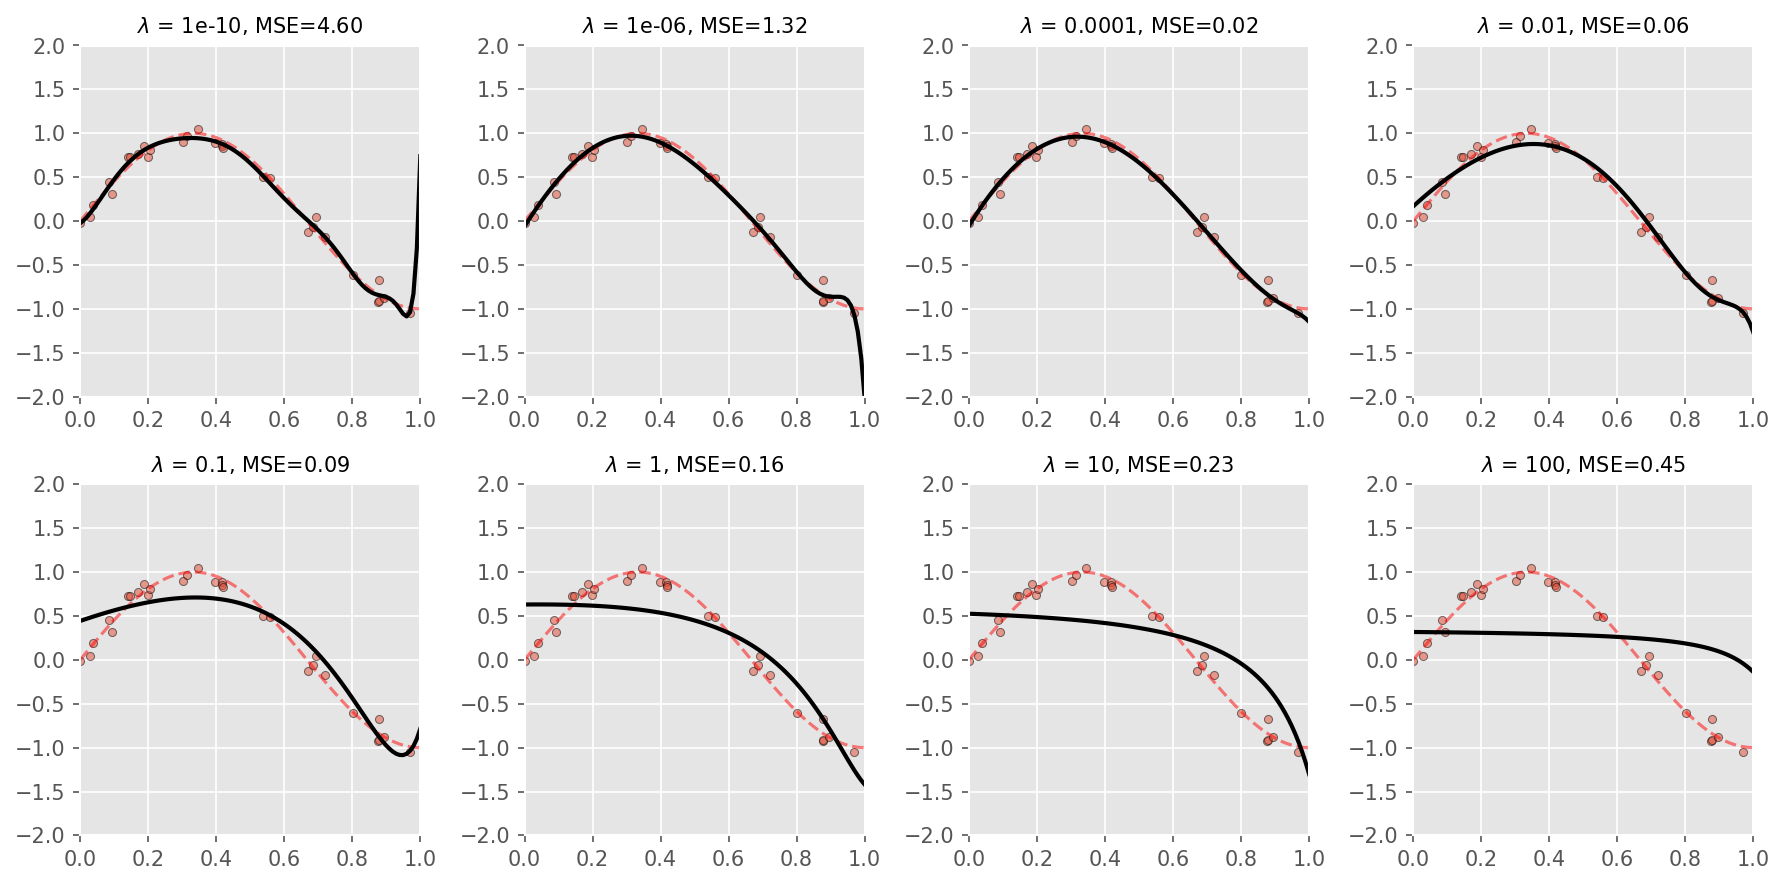

In [62]:
lmbdas = [1e-10, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10, 100]

plt.figure()

for lmbda in lmbdas:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10)

plt.show()

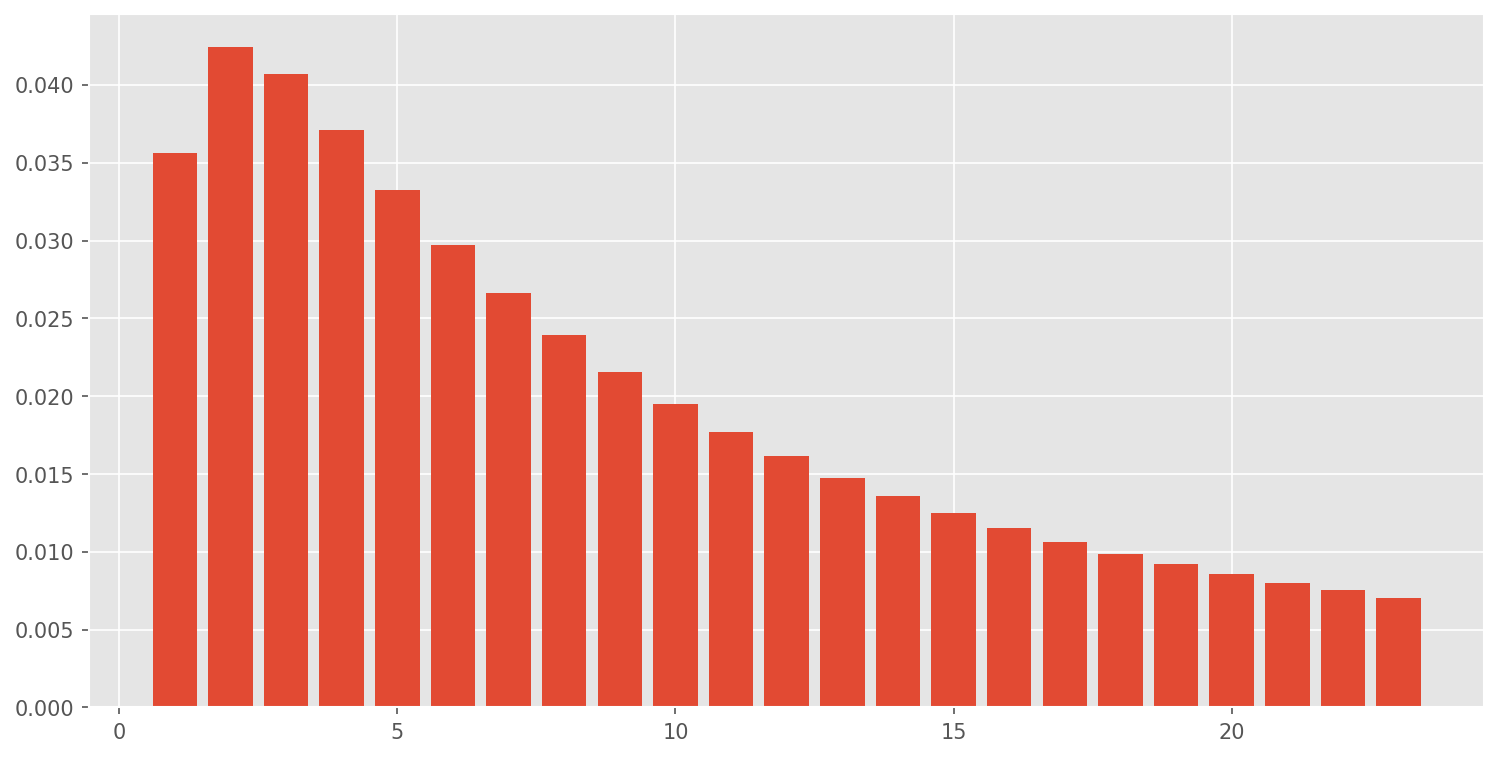

In [63]:
plot_coef(model.steps[1][1].coef_)

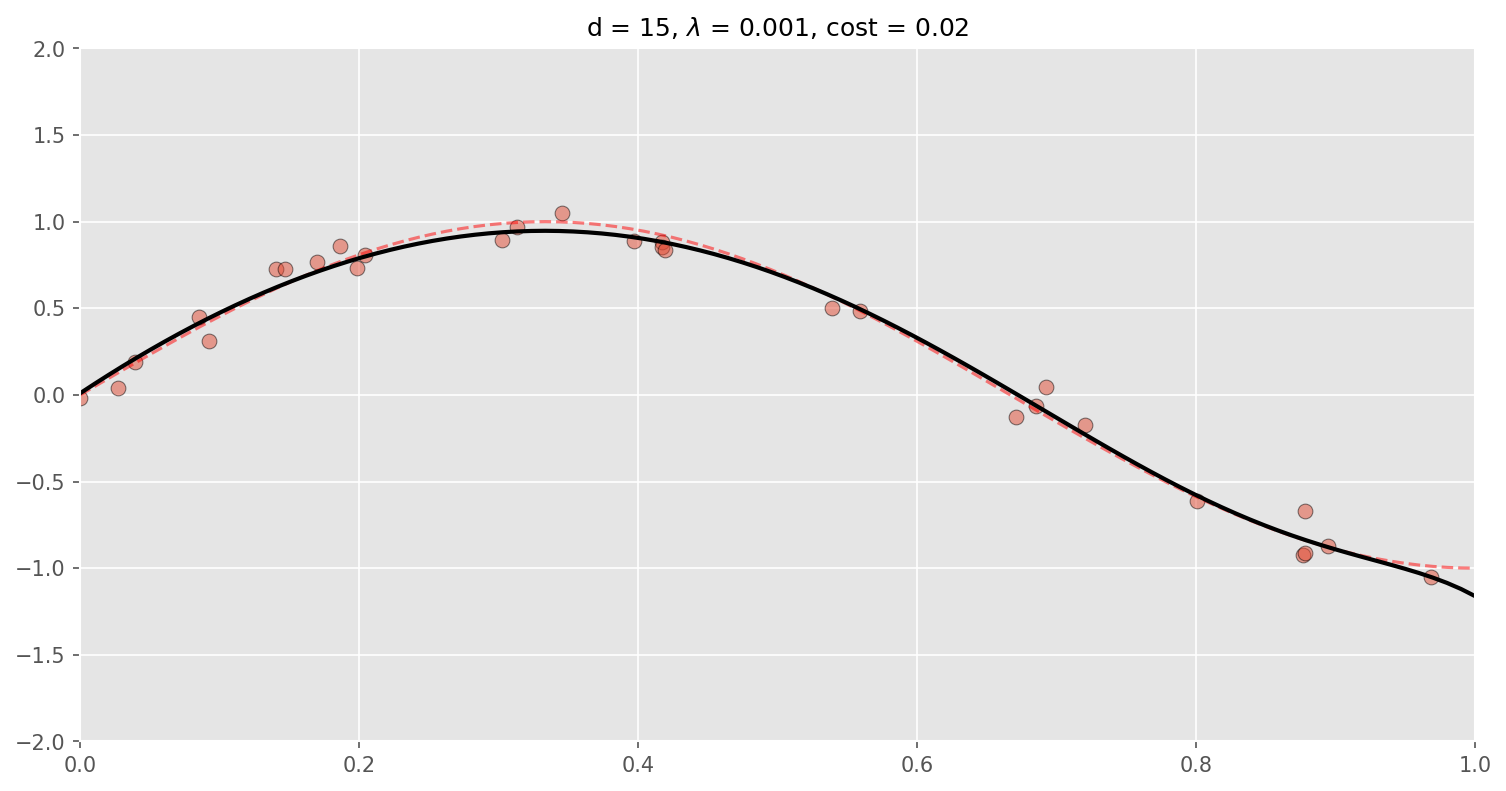

In [64]:
degree = 15
lmbda = 1e-3

# fit
model = fit_poly_L2_reg(degree, lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)

x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12)
plt.show()

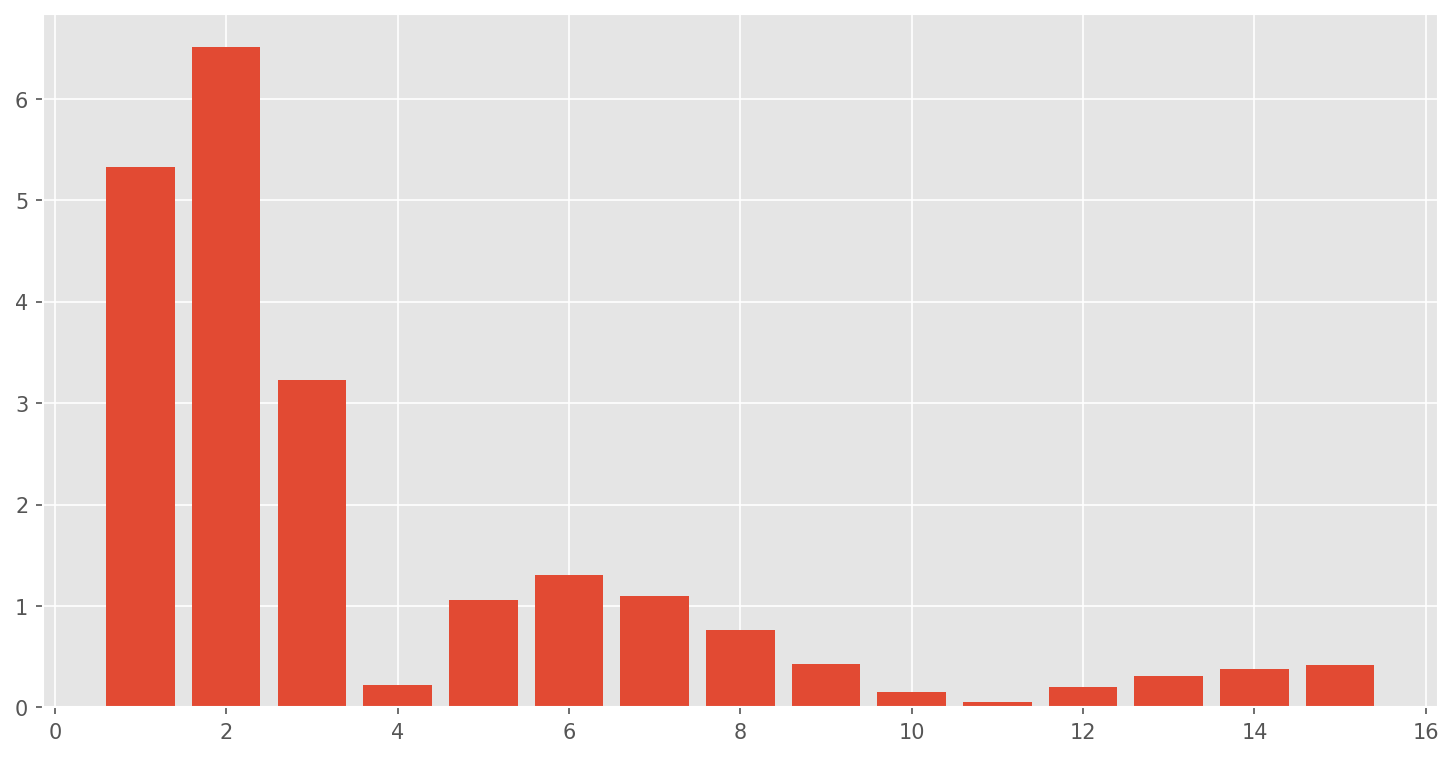

In [65]:
plot_coef(model.steps[1][1].coef_)

### L1-Regularizarion (Lasso)

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j|$$

In [66]:
def fit_poly_L1_reg(degree=1, lmbda=1.0):
    
    # add polynomial features up to degree
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    l1_regression = Lasso(alpha=lmbda)
    model = Pipeline([("poly", polynomial_features), ("l1_reg", l1_regression)])
    
    # create and fit the model
    model.fit(x[:, None], y)
    return model

ValueError: num must be 1 <= num <= 8, not 9

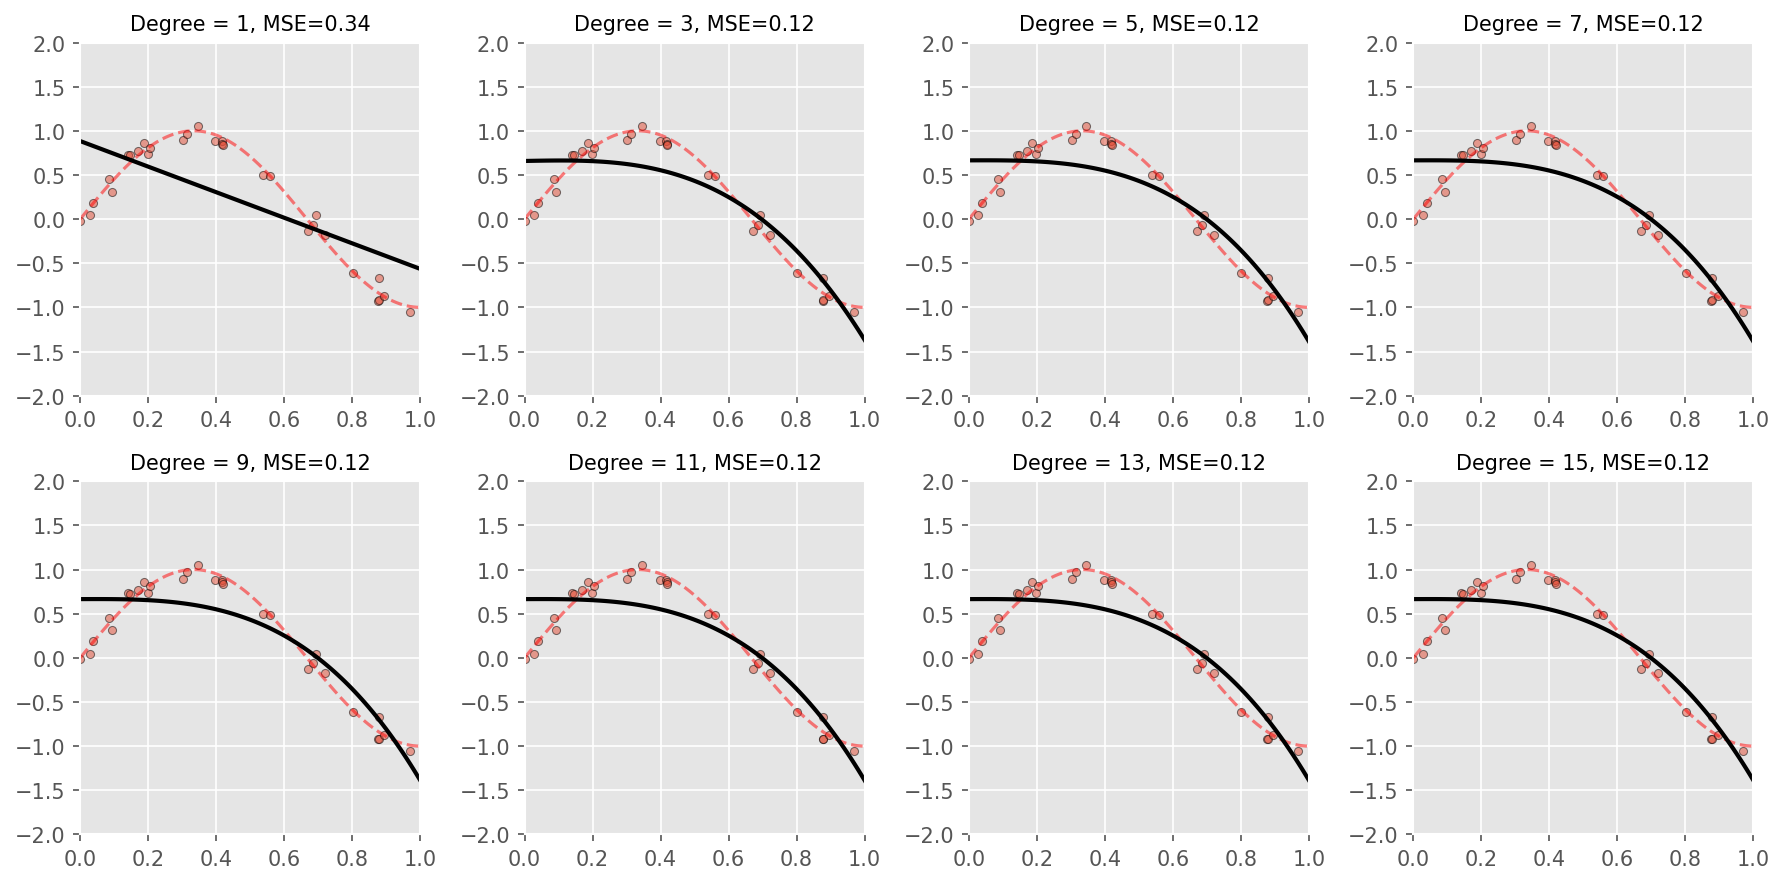

In [67]:
lmbda = 1e-2

plt.figure()

for d in degrees:
    model = fit_poly_L1_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, degrees.index(d) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10)
    
plt.show()

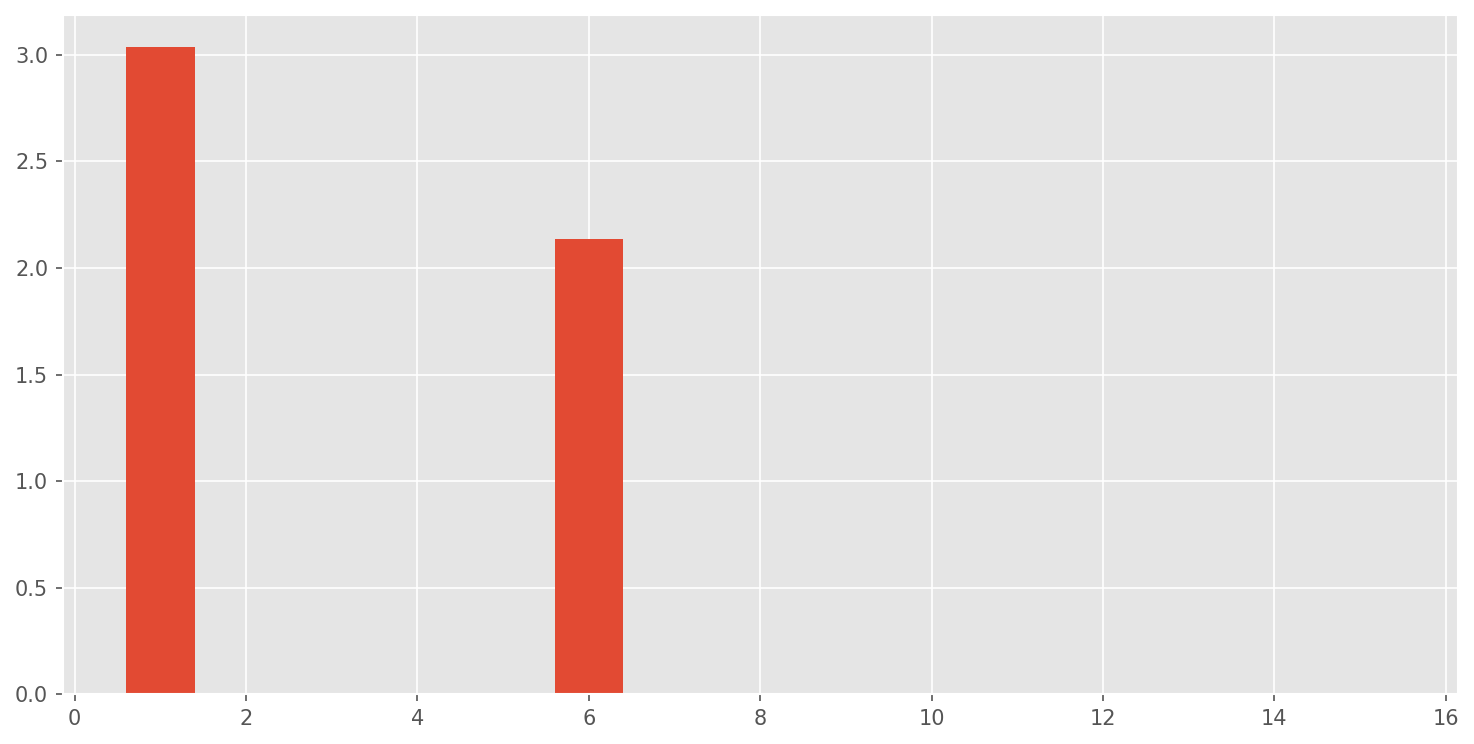

In [ ]:
plot_coef(model.steps[1][1].coef_)

Visualizing effect of $\lambda$

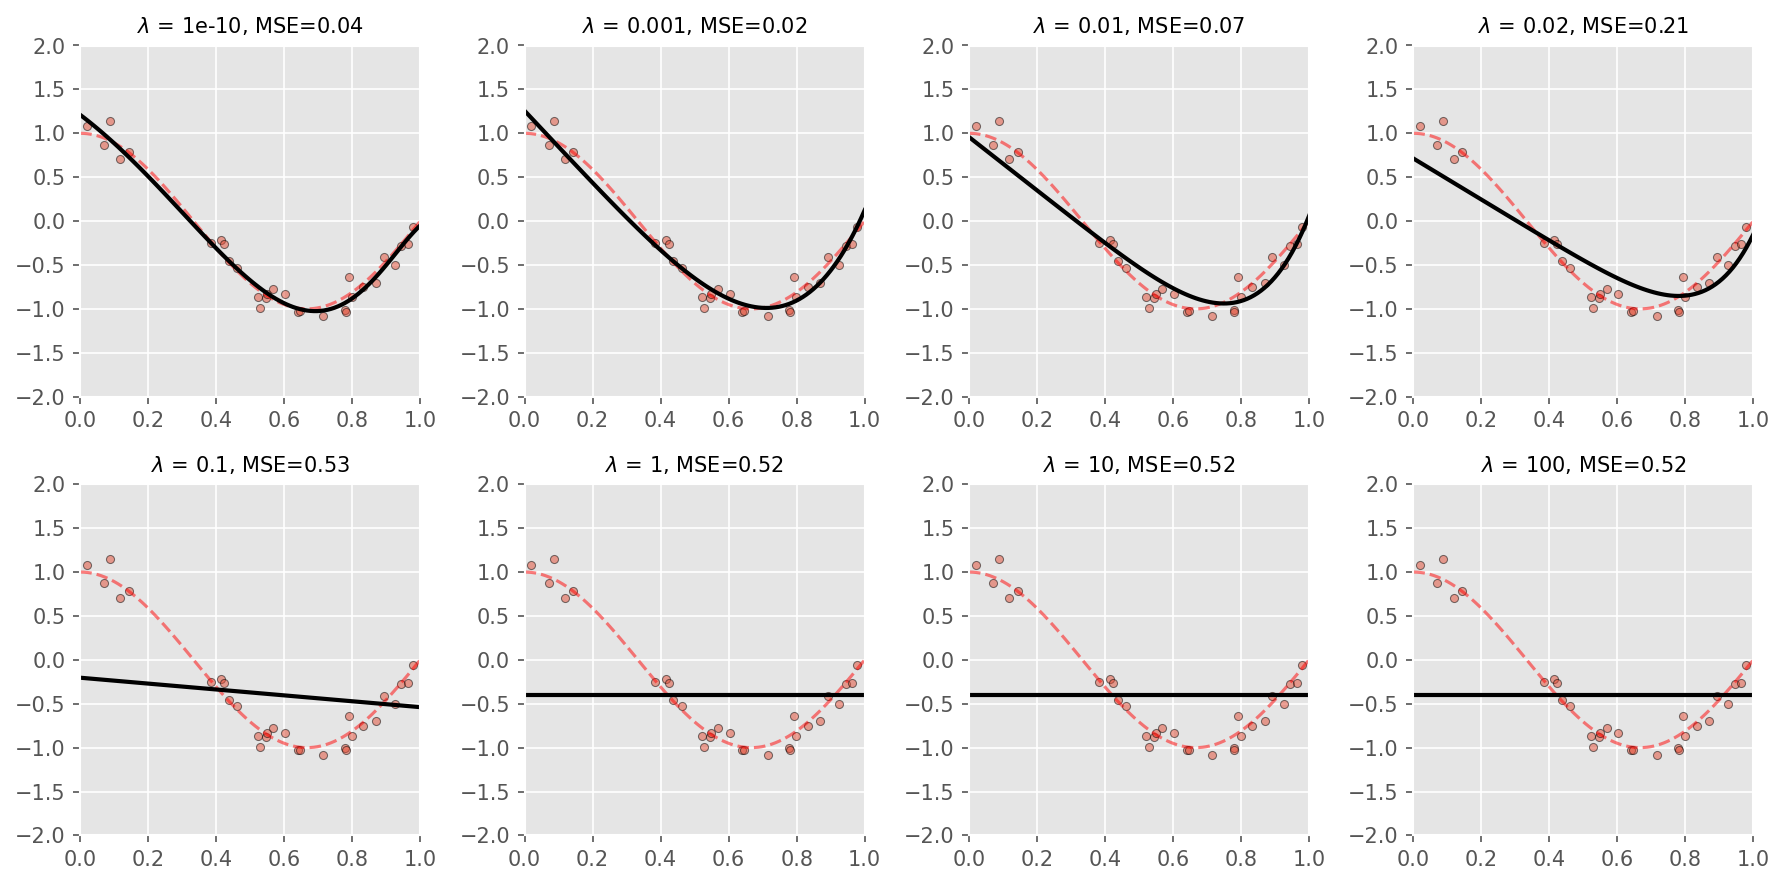

In [ ]:
lmbdas = [1e-10, 1e-3, 1e-2, 2e-2, 1e-1, 1, 10, 100]

plt.figure()

for lmbda in lmbdas:
    model = fit_poly_L1_reg(degree=15, lmbda=lmbda)
    
    # plot data and model
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10)

plt.show()

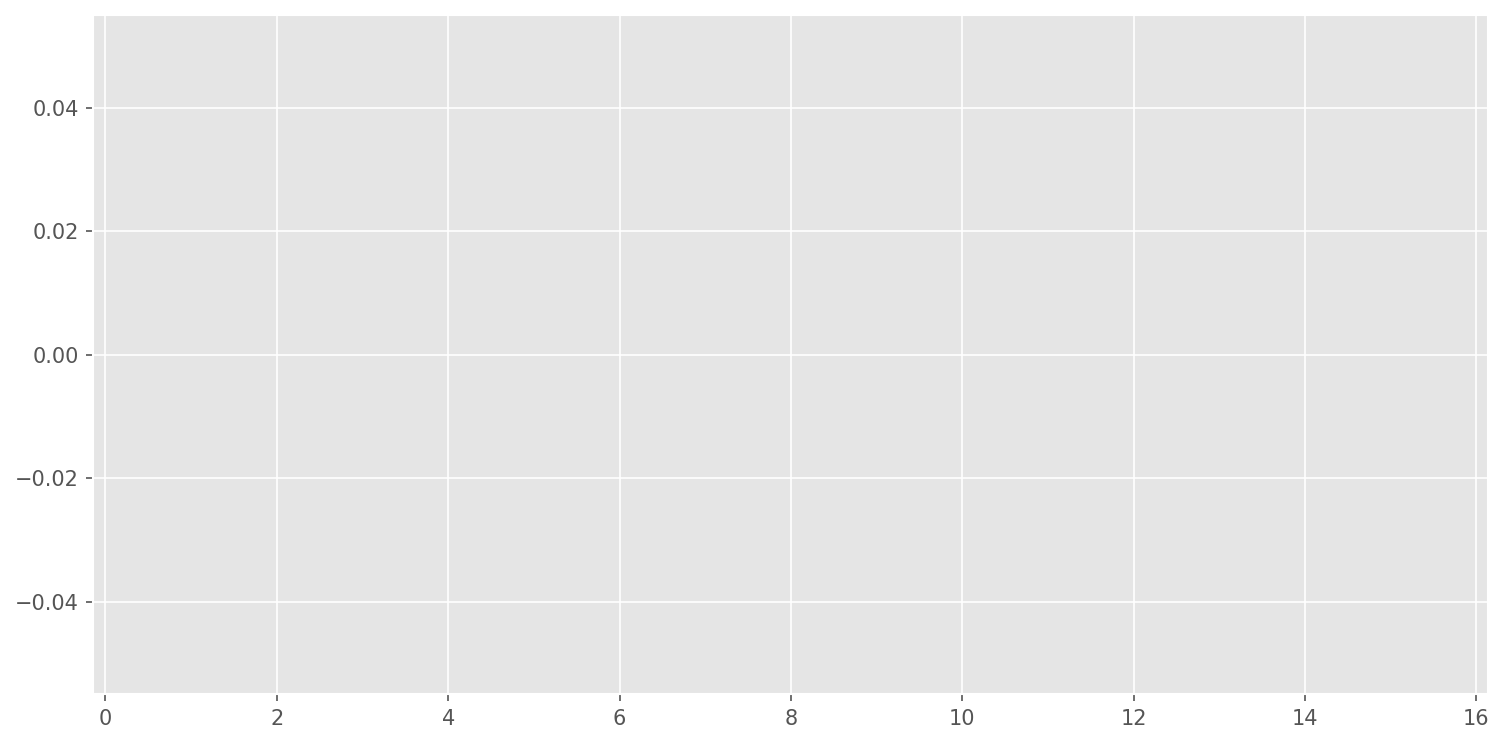

In [ ]:
plot_coef(model.steps[1][1].coef_)

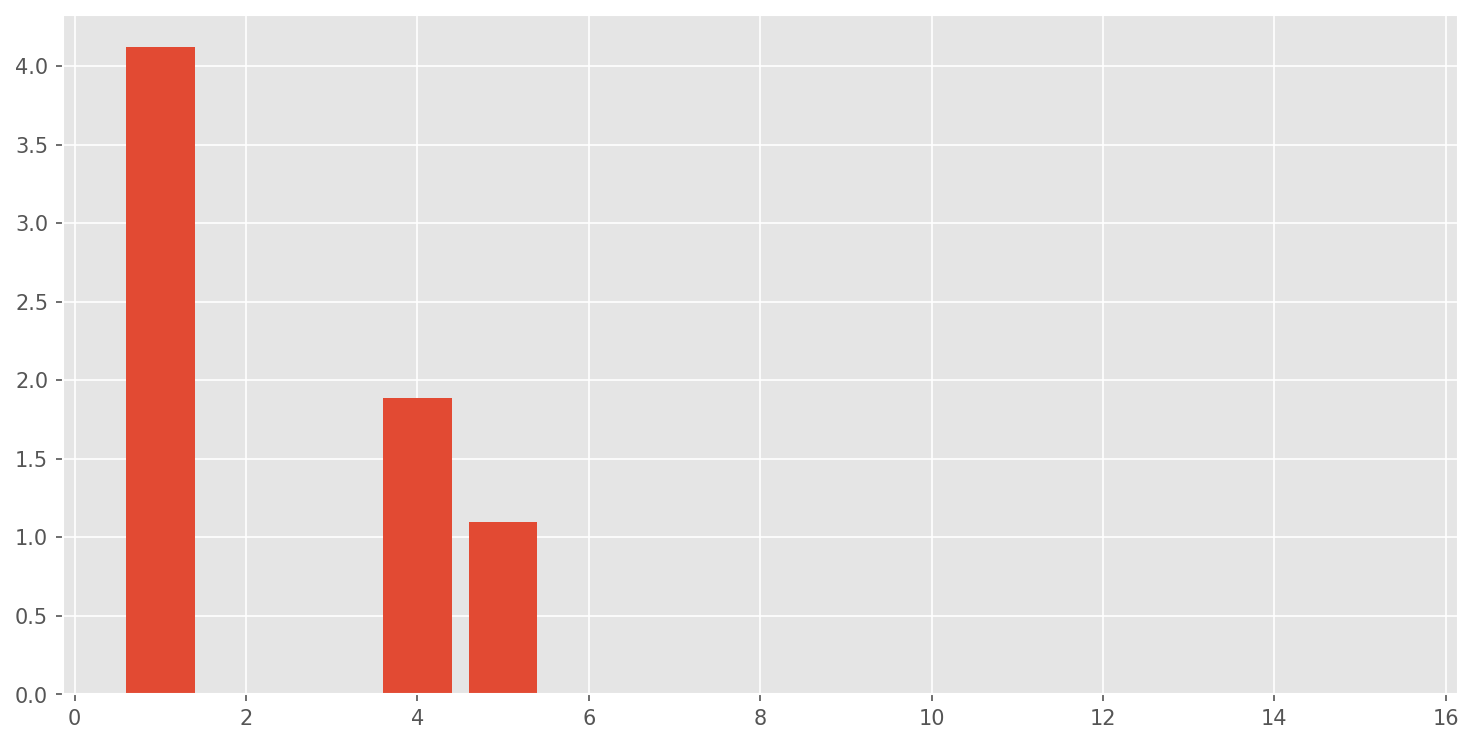

In [ ]:
model = fit_poly_L1_reg(degree=15, lmbda=0.001)
plot_coef(model.steps[1][1].coef_)

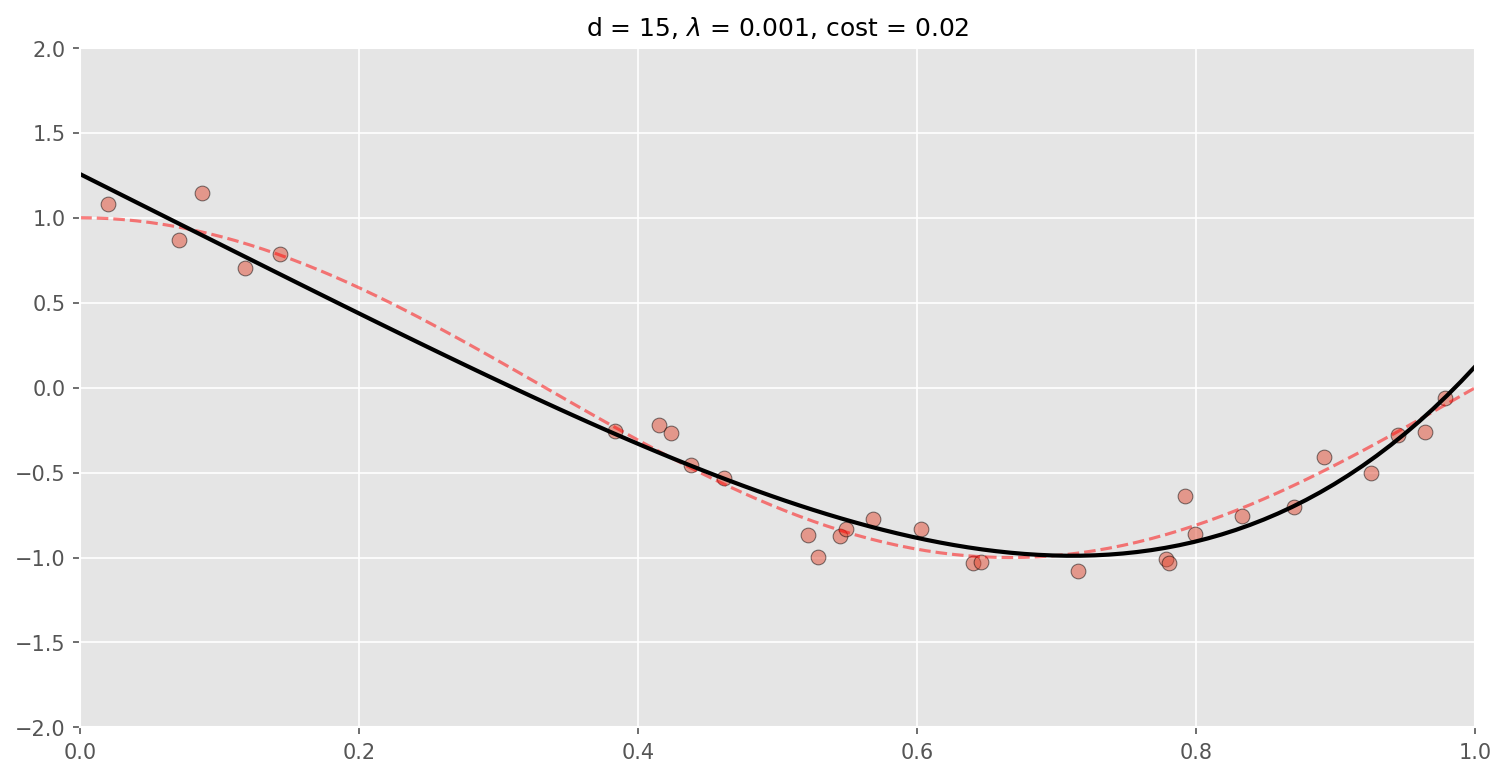

In [ ]:
degree = 15
lmbda = 1e-3

# fit
model = fit_poly_L1_reg(degree=degree, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)
x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12)
plt.show()

## Classification with Regularization

In [82]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

from plot_2d_separator import plot_2d_separator

(800, 2) (800,)


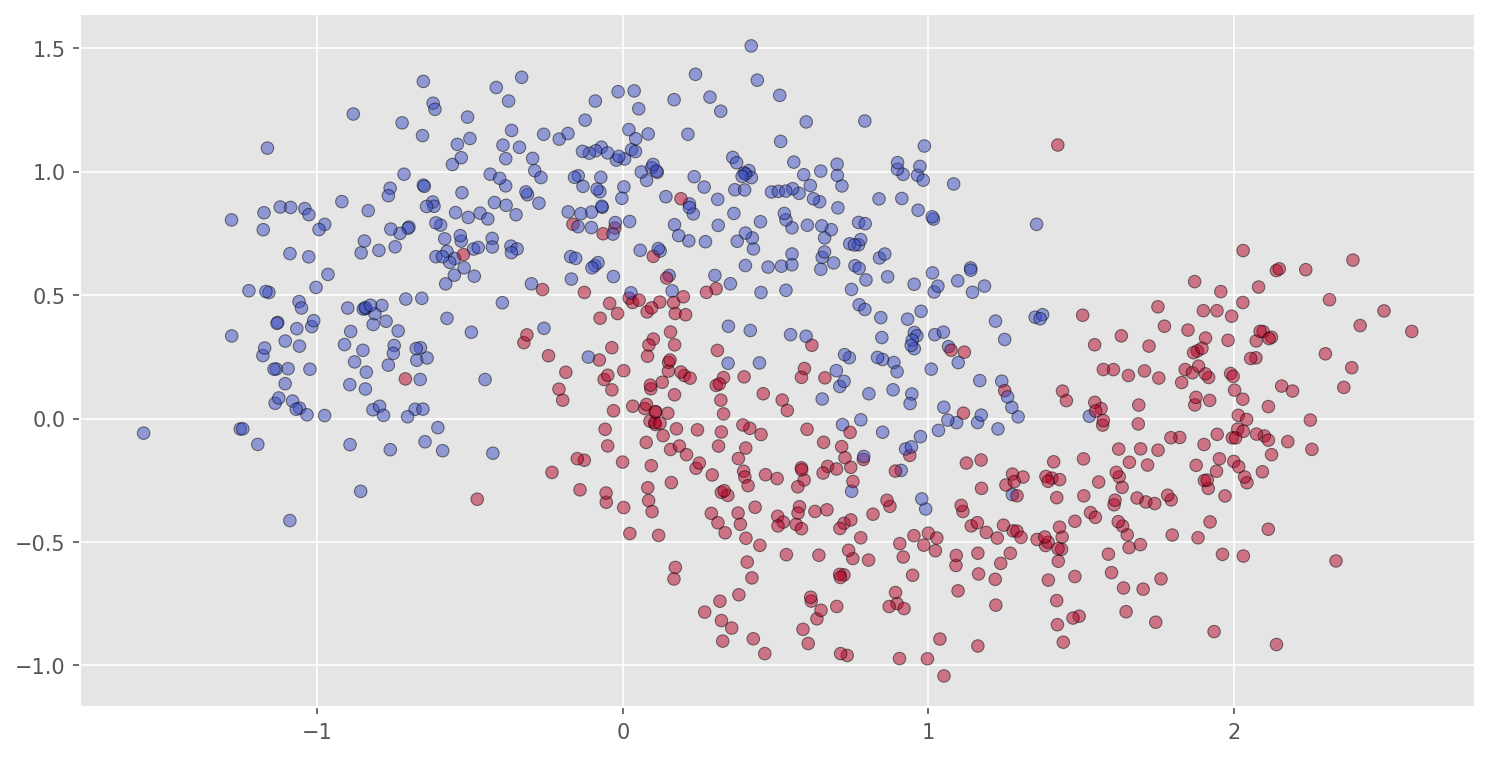

In [83]:
# create random data
X, y = make_moons(n_samples=800, noise=0.25, random_state=0)
print(X.shape, y.shape)

# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
plt.show()

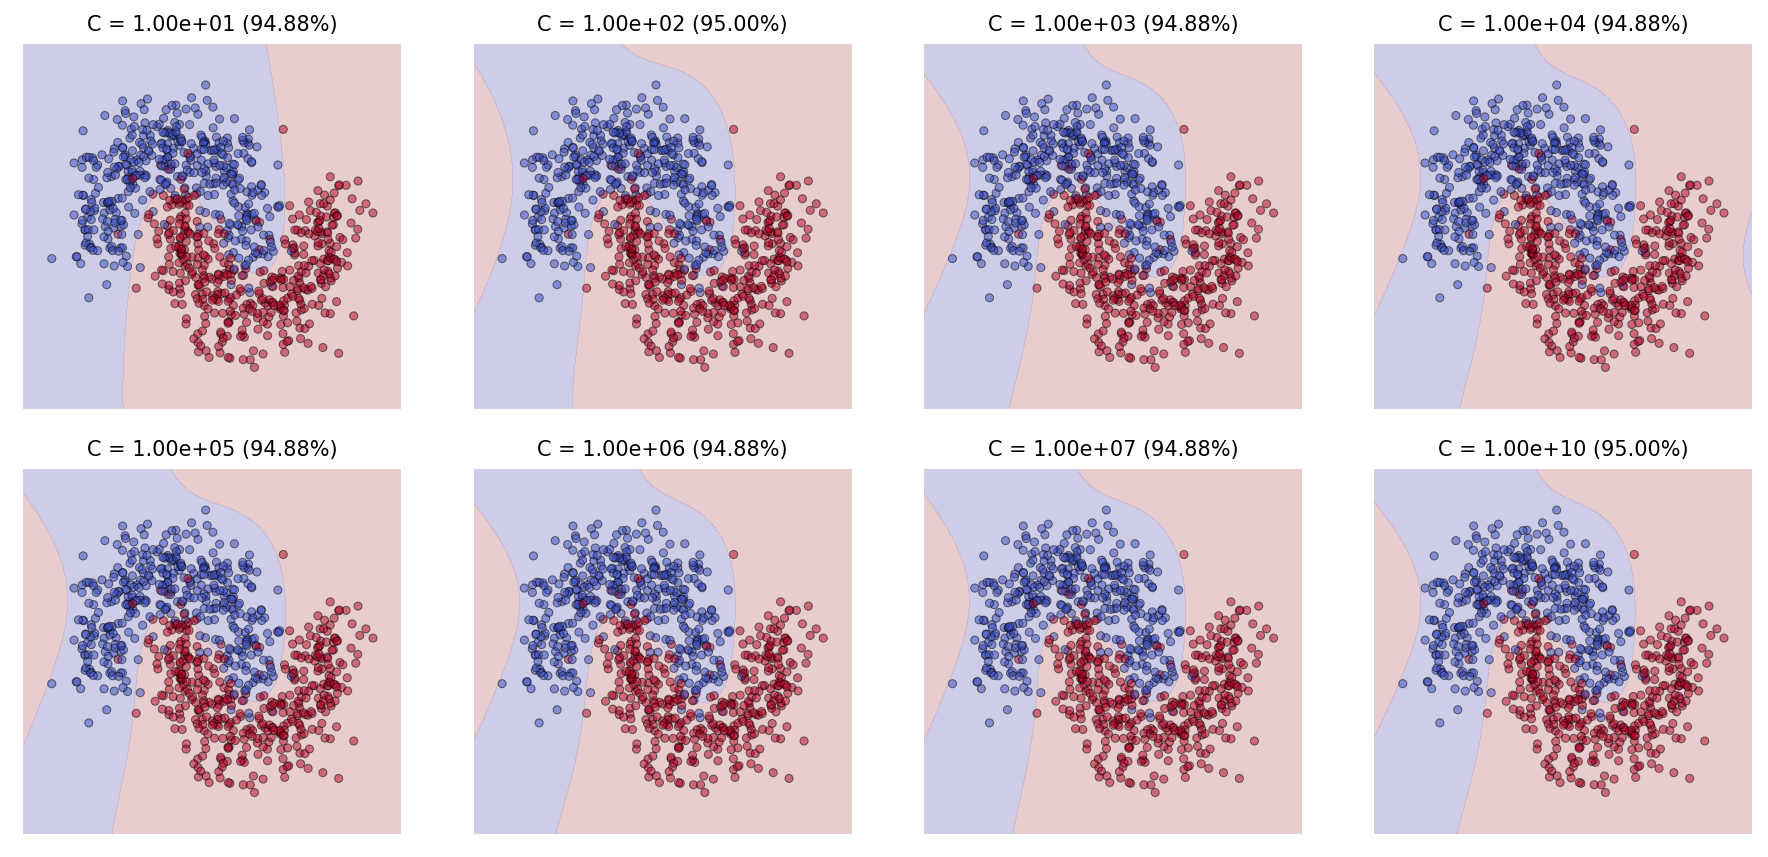

In [87]:


degree = 5
coeffs = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e10] #coeffs and lambda are in an inverse relation

plt.figure()

for C in coeffs:
    # create logistic regression classifier
    plt.subplot(2, 4, coeffs.index(C) + 1)
    plt.tight_layout() # for more readability and arrangment of the subplots
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    log_reg = LogisticRegression(C=C)
    model = Pipeline([("poly_features", poly_features), ("logistic_regression", log_reg)])
    
    # train classifier
    model.fit(X, y)
    accuracy = model.score(X, y)
    
    # plot classification results
    plot_2d_separator(model, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("C = {:.2e} ({:.2f}%)".format(C, accuracy * 100), fontsize=10)

plt.show()